# 🧹 데이터 전처리란?

##  데이터 전처리란?
👉 **“분석하기 전에 데이터를 깨끗하게 정리하는 과정”**

---
## 🎯 왜 전처리를 해야 할까?
데이터는 현실 세계에서 오기 때문에 완벽하지 않음
비어 있는 값(결측값)이 있을 수 있음

숫자가 아닌 이상한 문자가 섞여 있을 수 있음

중복된 행이 있을 수도 있음

단위나 형식이 제각각일 수도 있음

### **📌 그래서 전처리는 꼭 필요하다**

깨끗하고 일관성 있는 데이터가 있어야 정확한 분석과 예측이 가능

---
## ❓ 전처리는 뭘 할까?

### 🔧 전처리에서 자주 하는 일들


| 작업 종류       | 설명                                | 예시                           |
|----------------|-------------------------------------|--------------------------------|
| 결측치 처리    | 빠진 데이터를 처리함                 | `"NaN"`, 비어 있음             |
| 이상치 제거    | 너무 크거나 작은 비정상 데이터 제거 | 키가 500cm, 나이 -1살         |
| 중복 제거      | 똑같은 행(데이터) 지우기            | 똑같은 사람 정보가 두 번      |
| 형식 변환      | 문자열 → 숫자 등 형식 바꾸기         | `"25"` → `25` (숫자)          |
| 데이터 정렬    | 날짜 순, 점수 순 등 정렬             | 최신순, 가나다순 등            |
| 열 이름 정리   | 헷갈리는 이름 바꾸기                | `이름(한글)` → `name`         |

---

## 📌 예제. 송도 교통량 데이터


In [ ]:
import pandas as pd  # pandas: 데이터를 표처럼 다루게 해주는 라이브러리

In [ ]:
from google.colab import files  # 구글 코랩에서 파일 업로드 도구 제공
uploaded = files.upload()  # 파일 업로드 창 열고 파일 업로드

Saving 인천광역시_송도국제도시 교통량_20210331.csv to 인천광역시_송도국제도시 교통량_20210331.csv


In [ ]:
# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename, encoding='euc-kr') # 송도 교통량 데이터파일을 데이터 프레임에 넣음

In [ ]:
df.head(10)  # 데이터의 상위 5행 출력 (기본값 5)


,일자,요일,도로명,링크아이디,검지기아이디,지점명,방향,시점명,종점명,00시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2021-01-01,금,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,87,...,387,435,473,453,408,367,284,200,138,111
1,2021-01-02,토,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,69,...,514,579,522,546,518,427,303,249,205,91
2,2021-01-03,일,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,63,...,418,497,497,458,416,330,280,209,144,80
3,2021-01-04,월,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,50,...,395,424,410,455,592,534,423,288,187,113
4,2021-01-05,화,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,76,...,427,435,421,469,534,610,458,335,253,121
5,2021-01-06,수,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,74,...,430,402,424,437,572,513,309,115,111,96
6,2021-01-07,목,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,1,...,296,352,346,373,449,482,325,206,192,94
7,2021-01-08,금,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,48,...,438,411,484,508,568,623,450,288,246,124
8,2021-01-09,토,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,67,...,642,624,600,548,519,526,393,320,268,101
9,2021-01-10,일,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,79,...,459,464,466,419,359,351,315,245,175,115


### 📌 여러 전처리 코드 목록

| 단계 | 코드 | 설명 |
|:----:|:-----|:------|
| 1️⃣ | `df.columns` | 데이터에 어떤 정보(열)가 들어 있는지 확인해요 |
| 2️⃣ | `df.shape` | 데이터가 몇 행(줄), 몇 열(항목)인지 확인해요 |
| 3️⃣ | `df.info()` | 각 열의 데이터 종류와 결측치 개수 등을 보여줘요 |
| 4️⃣ | `df.describe()` | 평균, 최대, 최소, 표준편차 등 숫자 정보 요약해요 |
| 5️⃣ | `df.isnull().sum()` | 비어 있는 값(NaN)이 몇 개인지 열마다 확인해요 |
| 6️⃣ | `df.fillna(0)` | NaN 값을 0으로 바꿔요 (또는 평균 등으로도 가능) |
| 7️⃣ | `df.duplicated().sum()` | 똑같은 행이 몇 개인지 확인해요 |
| 8️⃣ | `df.drop_duplicates()` | 중복된 행을 삭제해요 |
| 9️⃣ | `df.dtypes` | 각 열이 숫자인지 문자(string)인지 확인해요 |
| 🔟 | `pd.to_numeric(df['열이름'], errors='coerce')` | "잘함" 같은 문자를 숫자로 바꾸고 실패한 건 NaN으로 바꿔요 |
| ⓫ | `df.rename(columns={'옛이름': '새이름'})` | 헷갈리는 열 이름을 이해하기 쉽게 바꿔요 |
| ⓬ | `df.sort_values(by='열이름')` | 날짜순, 점수순 등으로 정렬해요 |
| ⓭ | `df[['이름', '나이']]` | 필요한 열만 골라서 볼 수 있어요 |
| ⓮ | `df[df['나이'] > 20]` | 조건에 맞는 행만 선택해서 보여줘요 |
| ⓯ | `df.to_csv('정리된_파일.csv', index=False)` | 정리한 데이터를 새 CSV 파일로 저장해요 |

🔷 해당 데이터로 코드들을 테스트 해보시는걸 추천합니다.

---
### 💾 데이터 일부만 다른 파일로 저장하기

분석에 필요한 부분만 골라서 **CSV 파일** 또는 **JSON 파일**로 저장할 수 있어요.

---

#### ✅ 1. 필요한 열만 선택해서 새 DataFrame 만들기

In [ ]:
df_9am = df[['도로명', '방향', '09시']]  # '도로명', '방향', '09시' 열만 골라서 새로운 데이터프레임 만들기

In [ ]:
df_9am.to_csv('송도국제도시_9am.csv', index=False)
# → 파일 이름: '송도국제도시_9am.csv'
# → index=False: 행 번호(0,1,2...)는 저장하지 않음

In [ ]:
df.to_json("인천광역시_송도국제도시 교통량_20210331.json",
           orient="records",         # 각 행(row)을 하나의 JSON 객체로 저장
           force_ascii=False,        # 한글이 깨지지 않게 저장
           indent=2)                 # 보기 좋게 줄 맞춤(indent) 적용

---

### 📂 JSON 파일 읽기 (공공 데이터 불러오기)

CSV 말고도 **JSON 형식**으로 저장된 데이터를 불러올 수 있어요.  
JSON은 웹, 공공데이터 포털 등에서 많이 사용하는 형식입니다.

---

#### ✅ 방법 1. `json.load()`로 직접 읽기

In [ ]:
import json  # JSON을 읽기 위한 기본 파이썬 모듈

with open('인천광역시_송도국제도시 교통량_20210331.json', 'r') as f:  # 파일 열기 (읽기 모드), ('f'는 파일 객체)
    data_json = json.load(f)  # 파일 내용을 Python의 dict/list 형식으로 파싱

# 확인해보기
print(type(data_json))  # → list 또는 dict로 출력될 수 있어요
print(data_json[0])     # 첫 번째 데이터 샘플 확인

<class 'list'>
{'일자': '2021-01-01', '요일': '금', '도로명': '테크노파크로', '링크아이디': 1640137900, '검지기아이디': 'SDTRVCT00100001', '지점명': '한국생산기술연구원 맞은편', '방향': '상행', '시점명': '한국생산기술연구원앞', '종점명': '미추홀타워입구', '00시': 87, '01시': 57, '02시': 53, '03시': 21, '04시': 16, '05시': 10, '06시': 26, '07시': 45, '08시': 91, '09시': 106, '10시': 164, '11시': 205, '12시': 266, '13시': 364, '14시': 387, '15시': 435, '16시': 473, '17시': 453, '18시': 408, '19시': 367, '20시': 284, '21시': 200, '22시': 138, '23시': 111}


In [ ]:
import pandas as pd

df_json = pd.read_json("인천광역시_송도국제도시 교통량_20210331.json")  # Pandas로 JSON을 DataFrame으로 바로 읽기
df_json.head(5)  # 읽은 데이터 확인

,일자,요일,도로명,링크아이디,검지기아이디,지점명,방향,시점명,종점명,00시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2021-01-01,금,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,87,...,387,435,473,453,408,367,284,200,138,111
1,2021-01-02,토,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,69,...,514,579,522,546,518,427,303,249,205,91
2,2021-01-03,일,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,63,...,418,497,497,458,416,330,280,209,144,80
3,2021-01-04,월,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,50,...,395,424,410,455,592,534,423,288,187,113
4,2021-01-05,화,테크노파크로,1640137900,SDTRVCT00100001,한국생산기술연구원 맞은편,상행,한국생산기술연구원앞,미추홀타워입구,76,...,427,435,421,469,534,610,458,335,253,121


---
## 🔍 특정 도로와 날짜의 09시 교통량 조회

우리는 **"송도국제대로"의 2021년 1월 1일 오전 9시 교통량**을 확인하고,  
**그 도로의 전체 9시 평균 교통량**도 계산해보겠습니다.

---

### ✅ 1. "송도국제대로"의 2021-01-01 09시 교통량 출력

In [ ]:
# 조건 1: 도로명이 "송도국제대로"인지 확인
# 조건 2: 날짜(일자)가 "2021-01-01"인지 확인
# 두 조건이 모두 참(True)인 행의 "09시" 열만 출력

print(df[(df["도로명"] == "송도국제대로") & (df["일자"] == "2021-01-01")]["09시"])

124    591
155    421
Name: 09시, dtype: int64


In [ ]:
# 조건: 도로명이 "송도국제대로"인 행만 선택
# 09시 열만 가져와 평균을 계산

condition = (df['도로명'] == "송도국제대로")  # 조건 변수로 저장
print(df.loc[condition, '09시'].mean())  # 조건에 맞는 09시만 골라서 평균 계산

1915.3055555555557


---
## 📊 실습: 데이터 상관관계 및 통계량 조회

이번에는 **시간대별 교통량 간의 관계와 요약 통계**를 확인해볼 거예요.

---

### ✅ 1. 오전 9시, 오후 2시(14시), 오후 6시(18시) 교통량의 **상관계수** 보기

In [ ]:
# 3개 시간대(09시, 14시, 18시)의 교통량 사이에
# 서로 얼마나 관계가 있는지 숫자로 확인할 수 있어요.

print(df[['09시', '14시', '18시']].corr()) # 데이터프레임에서 09시, 14시, 18시 이 세 시간의 교통량 데이터를 뽑아서, 서로 얼마나 관련이 있는지를 계산

          09시       14시       18시
09시  1.000000  0.661098  0.750643
14시  0.661098  1.000000  0.897277
18시  0.750643  0.897277  1.000000


---
## ✅ 2. 오전 9시, 오후 1시(13시) 교통량의 통계 요약 보기


In [ ]:
# 각 시간대 교통량의 평균, 최대/최소, 표준편차 등을 보여줍니다.

print(df[['09시', '13시']].describe()) # 09시와 13시 교통량 데이터를 뽑아서, 그 숫자들이 어떤 특징이 있는지 간단하게 요약

               09시          13시
count  1440.000000  1440.000000
mean    841.231250   660.964583
std     724.194009   402.906705
min      35.000000    50.000000
25%     278.500000   381.000000
50%     607.500000   607.500000
75%    1181.500000   845.000000
max    2783.000000  2201.000000


---
## 🔍 데이터 탐색: 각 도로가 몇 번 나오는지 확인하기

우리가 사용하는 데이터에는 여러 개의 도로명이 있어요.  
예를 들어 '송도국제대로', '송도바이오대로', '테크노파크로' 등이 반복해서 나올 수 있죠.

그렇다면 각 도로명이 **몇 번씩 등장하는지** 알고 싶을 때는?

👉 `value_counts()`를 사용하면 됩니다!

In [ ]:
# pandas 불러오기
import pandas as pd  # pandas는 표 형태의 데이터를 다루는 데 유용한 라이브러리예요

# CSV 파일 불러오기
# 파일명 자동 추출
filename = list(uploaded.keys())[0]

# 해당 파일 읽기
df = pd.read_csv(filename, encoding='euc-kr')

# 도로명이 몇 번씩 나왔는지 세어볼게요
# value_counts()는 '이 값이 몇 개 있는지' 세주는 함수입니다
도로_카운트 = df['도로명'].value_counts()

# 결과 출력
print("📊 도로명별 등장 횟수:")
print(도로_카운트)

📊 도로명별 등장 횟수:
도로명
테크노파크로     180
아트센터대로     180
컨벤시아대로     180
송도국제대로     180
인천타워대로     180
첨단대로       180
송도과학로      180
송도바이오대로     90
송도문화로       90
Name: count, dtype: int64


---
## 🧹 행(row) 삭제 실습

### 예를 들어, 데이터프레임(df)에서 처음 10개의 행을 삭제하고 싶을 때 사용해요
### np.arange(10)은 [0,1,2,...,9]를 만들어주기 때문에, 앞쪽 10개 줄을 가리켜요



In [ ]:
# np.arange(10)은 [0,1,2,...,9]를 만들어주기 때문에, 앞쪽 10개 줄을 가리켜요

import numpy as np  # numpy도 함께 불러와야 np.arange()를 쓸 수 있어요

df_cleaned = df.drop(index=np.arange(10))  # df에서 0~9번 인덱스를 삭제한 새로운 DataFrame 생성

# 결과 출력
print("\n🗑️ 앞쪽 10개 행 삭제한 데이터:")
print(df_cleaned.head())  # 변경된 데이터 상위 몇 개만 출력해서 확인


🗑️ 앞쪽 10개 행 삭제한 데이터:
            일자 요일     도로명       링크아이디           검지기아이디            지점명  방향  \
10  2021-01-11  월  테크노파크로  1640137900  SDTRVCT00100001  한국생산기술연구원 맞은편  상행   
11  2021-01-12  화  테크노파크로  1640137900  SDTRVCT00100001  한국생산기술연구원 맞은편  상행   
12  2021-01-13  수  테크노파크로  1640137900  SDTRVCT00100001  한국생산기술연구원 맞은편  상행   
13  2021-01-14  목  테크노파크로  1640137900  SDTRVCT00100001  한국생산기술연구원 맞은편  상행   
14  2021-01-15  금  테크노파크로  1640137900  SDTRVCT00100001  한국생산기술연구원 맞은편  상행   

           시점명      종점명  00시  ...  14시  15시  16시  17시  18시  19시  20시  21시  \
10  한국생산기술연구원앞  미추홀타워입구   88  ...  444  432  437  494  522  638  456  343   
11  한국생산기술연구원앞  미추홀타워입구   66  ...  432  510  235  379  426  456  295  175   
12  한국생산기술연구원앞  미추홀타워입구   61  ...  398  429  479  485  585  630  427  340   
13  한국생산기술연구원앞  미추홀타워입구   68  ...  492  456  449  475  524  599  410  305   
14  한국생산기술연구원앞  미추홀타워입구   76  ...  453  434  482  583  645  632  500  324   

    22시  23시  
10  298  115  
11  172   75  
12  274

---
## 🧹 이어서: 열(column) 삭제 실습

### 예를 들어, '링크아이디'와 '검지기아이디' 열이 분석에 필요 없다고 판단되면 삭제할 수 있어요

In [ ]:
df_cleaned = df.drop(['링크아이디', '검지기아이디'], axis=1)  # axis=1은 열(column)을 의미해요

# 결과 출력
print("\n🗂️ '링크아이디', '검지기아이디' 열 삭제한 데이터:")
print(df_cleaned.head())


🗂️ '링크아이디', '검지기아이디' 열 삭제한 데이터:
           일자 요일     도로명            지점명  방향         시점명      종점명  00시  01시  \
0  2021-01-01  금  테크노파크로  한국생산기술연구원 맞은편  상행  한국생산기술연구원앞  미추홀타워입구   87   57   
1  2021-01-02  토  테크노파크로  한국생산기술연구원 맞은편  상행  한국생산기술연구원앞  미추홀타워입구   69   26   
2  2021-01-03  일  테크노파크로  한국생산기술연구원 맞은편  상행  한국생산기술연구원앞  미추홀타워입구   63   43   
3  2021-01-04  월  테크노파크로  한국생산기술연구원 맞은편  상행  한국생산기술연구원앞  미추홀타워입구   50   34   
4  2021-01-05  화  테크노파크로  한국생산기술연구원 맞은편  상행  한국생산기술연구원앞  미추홀타워입구   76   35   

   02시  ...  14시  15시  16시  17시  18시  19시  20시  21시  22시  23시  
0   53  ...  387  435  473  453  408  367  284  200  138  111  
1   23  ...  514  579  522  546  518  427  303  249  205   91  
2   29  ...  418  497  497  458  416  330  280  209  144   80  
3   22  ...  395  424  410  455  592  534  423  288  187  113  
4   16  ...  427  435  421  469  534  610  458  335  253  121  

[5 rows x 31 columns]


---
## 🚦 [실습] '교통정체' 라는 새로운 열(column) 추가해볼게요
### 기준: 총 교통량이 7000을 초과하면 True, 아니면 False




In [ ]:

hour_columns = [f"{str(i).zfill(2)}시" for i in range(24)]

df['총교통량'] = df[hour_columns].sum(axis=1)

df['교통정체'] = (df['총교통량'] > 7000)

print("\n🚦 총교통량과 교통정체 열 추가 결과:")
print(df[['도로명', '총교통량', '교통정체']].head())


# 1. 먼저 '총교통량' 열을 만들어야 해요!
# 방법: '00시' ~ '23시'까지 교통량을 다 더해서 계산
# f-string을 이용해 '00시', '01시', ..., '23시' 형식으로 만듦
# 00시부터 23시까지의 열 이름을 리스트로 자동 생성
# axis=1 → 각 행별로 가로 방향(→) 합계를 계산하라는 뜻
# 해당 시간 열들을 다 더해서 새로운 열 '총교통량'으로 저장
# 2. '총교통량'이 7000보다 많으면 True, 아니면 False를 담는 '교통정체' 열 생성
# 결과 확인 (앞 5개 행만 보여줘요)




🚦 총교통량과 교통정체 열 추가 결과:
      도로명  총교통량   교통정체
0  테크노파크로  4767  False
1  테크노파크로  5983  False
2  테크노파크로  4939  False
3  테크노파크로  6887  False
4  테크노파크로  7195   True


---
## 폰트 문제

In [ ]:
# 1. 나눔폰트 설치 (Colab용)
!apt-get -qq install fonts-nanum

# 2. 런타임에 다시 반영되도록 matplotlib 캐시 초기화
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 캐시 삭제 후 다시 시작하는 게 가장 안전함
import os
import shutil
shutil.rmtree('/root/.cache/matplotlib')

# 3. 런타임 재시작 후 아래 코드 실행
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 나눔바른고딕 설정
plt.rcParams['axes.unicode_minus'] = False        # 마이너스 깨짐 방지

---
## 📊 [실습] 도로별 총교통량을 막대그래프로 표현해볼게요


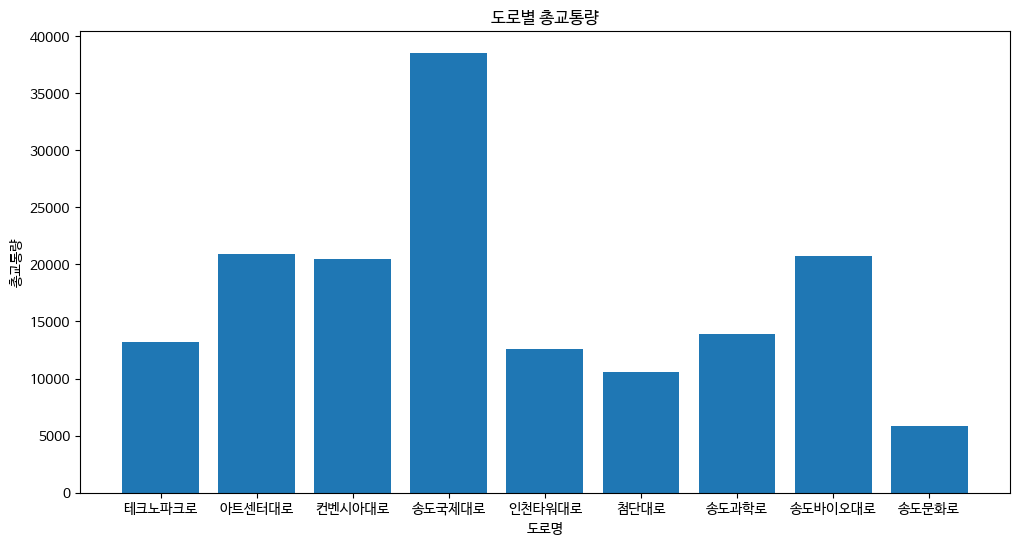

In [ ]:

import matplotlib.pyplot as plt  # 그래프를 그리는 도구 matplotlib 불러오기

# ▶️ 한글이 깨지지 않도록 글꼴 설정
# Windows 사용자용 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'     # '맑은 고딕' 글꼴 지정
# plt.rcParams['axes.unicode_minus'] = False        # 마이너스 기호(-) 깨짐 방지

# 👉 만약 Mac을 사용 중이라면 아래 줄로 교체하세요:
plt.rcParams['font.family'] = 'NanumBarunGothic'

# ▶️ 그래프 크기 설정 (가로 12인치, 세로 6인치)
plt.figure(figsize=(12, 6))

# ▶️ 막대 그래프 그리기
plt.bar(df['도로명'], df['총교통량'])  # x축: 도로명, y축: 총교통량

# ▶️ 제목, 축 라벨 추가
plt.title("도로별 총교통량")   # 그래프 제목
plt.xlabel("도로명")           # x축 제목
plt.ylabel("총교통량")         # y축 제목

# ▶️ 그래프 보여주기
plt.show()

---
## 📊 [실습] seaborn으로 도로별 총교통량 막대그래프 그리기

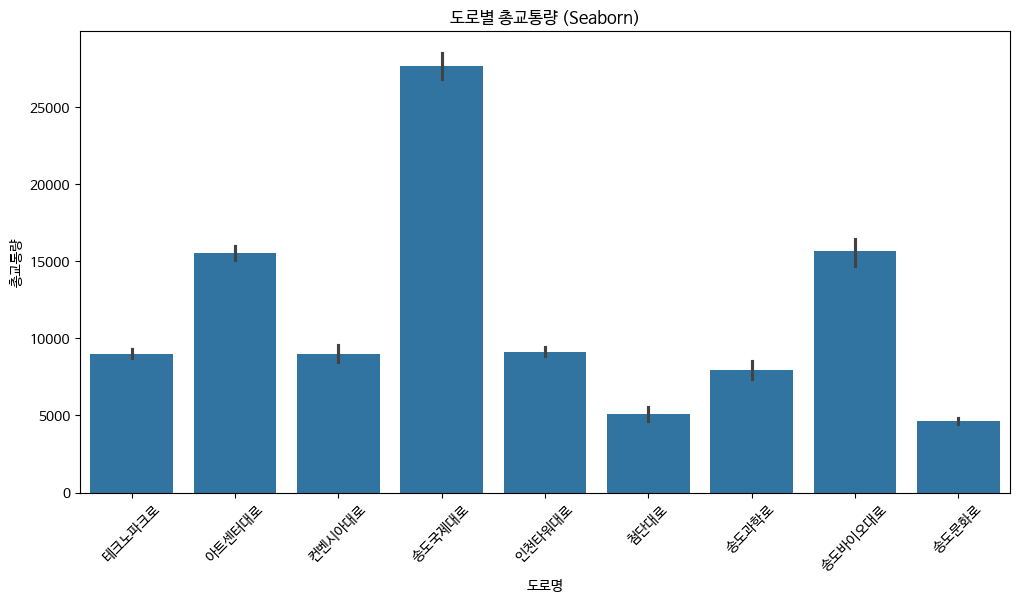

In [ ]:
import seaborn as sns  # seaborn: 통계적 그래프를 쉽게 그릴 수 있게 도와주는 라이브러리

# 📊 도로별 총교통량을 막대 그래프로 보기

plt.figure(figsize=(12, 6))  # 그래프 크기 설정 (가로 12, 세로 6)

# seaborn의 barplot()을 이용해 막대 그래프 그리기
sns.barplot(x="도로명", y="총교통량", data=df)  # x축: 도로명, y축: 총교통량

# x축 레이블이 겹치지 않도록 45도 회전
plt.xticks(rotation=45)

# 그래프 보여주기
plt.title("도로별 총교통량 (Seaborn)")  # 그래프 제목
plt.xlabel("도로명")                  # x축 제목
plt.ylabel("총교통량")                # y축 제목
plt.show()

---
## 📈 실습: 총 교통량 데이터 변화 추세 그리기 (도로별 시간대 평균 꺾은선 그래프)


/tmp/ipython-input-24-810334772.py:18: UserWarning: Glyph 128344 (\N{CLOCK FACE NINE OCLOCK}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()  # 그래프 요소 간의 간격을 자동으로 조정합니다.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128344 (\N{CLOCK FACE NINE OCLOCK}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


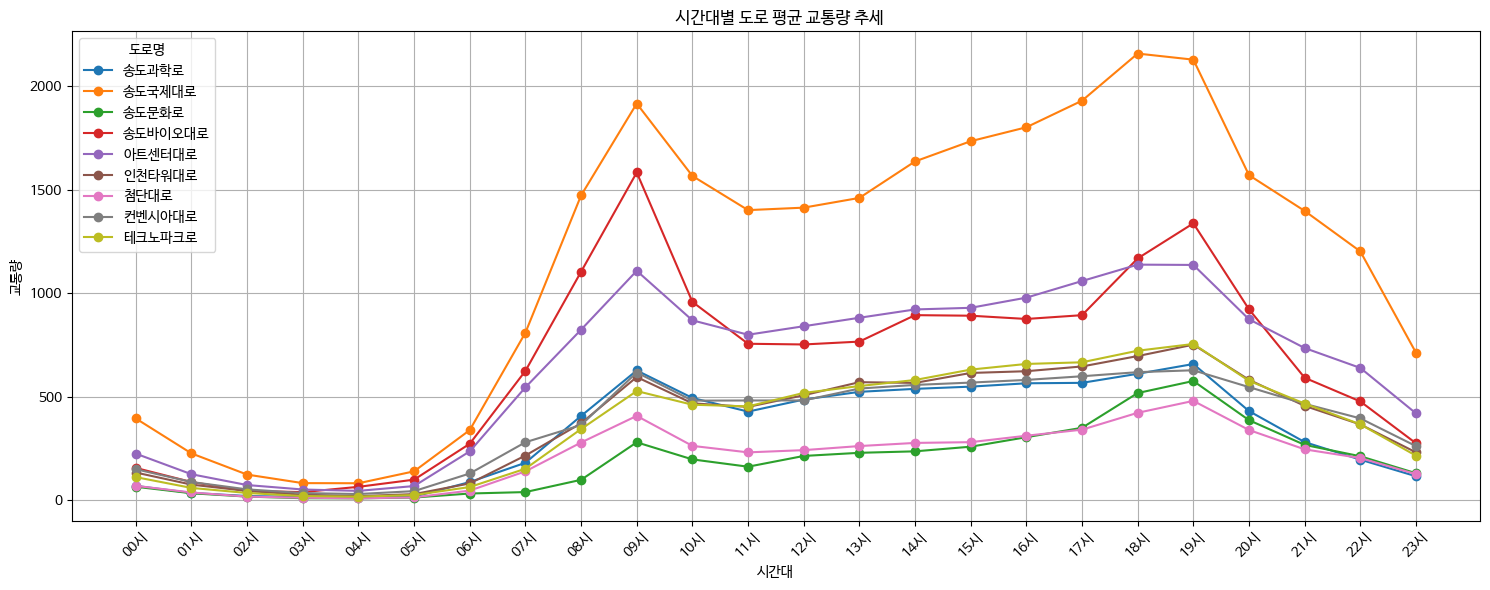

In [ ]:

hour_by_road = df.groupby("도로명")[hour_columns].mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))  # 가로 15, 세로 6 크기의 그래프를 만듭니다.


for road_name, row in hour_by_road.iterrows():
    plt.plot(hour_columns, row.values, label=road_name, marker='o')


# 그래프에 제목과 축 라벨을 추가합니다.
plt.title("🕘 시간대별 도로 평균 교통량 추세")
plt.xlabel("시간대")  # x축 이름입니다.
plt.ylabel("교통량")  # y축 이름입니다.
plt.xticks(rotation=45)  # x축 라벨이 겹치지 않도록 45도 회전합니다.
plt.legend(title="도로명")  # 범례를 추가합니다.
plt.grid(True)  # 눈금선을 표시하여 그래프를 더 보기 쉽게 만듭니다.
plt.tight_layout()  # 그래프 요소 간의 간격을 자동으로 조정합니다.
plt.show()  # 그래프를 화면에 출력합니다.

#----------------------------------------------------------

# 'hour_columns'에는 00시부터 23시까지의 시간대 열 이름이 들어 있습니다.
# 이전 단계에서 hour_columns를 다음과 같이 정의했습니다.
# hour_columns = [f"{str(i).zfill(2)}시" for i in range(24)]

# 도로명별로 시간대 평균을 계산합니다.
# groupby("도로명")은 도로명을 기준으로 데이터를 묶습니다.
# [hour_columns]는 시간대에 해당하는 열만 선택합니다.
# mean()은 각 열의 평균값을 계산합니다.

# 꺾은선 그래프를 그리기 위한 준비를 합니다.

# 도로명별로 꺾은선 그래프를 하나씩 그립니다.
# hour_columns는 x축(시간대), row.values는 y축(평균 교통량)입니다.
# marker='o'는 각 지점을 동그라미로 표시합니다.

---
## 📊 실습: 도로별 오전 9시 교통량의 경향을 확인해봅니다
도로별로 오전 9시에 교통량이 얼마나 되었는지,
그리고 그 값들이 얼마나 퍼져 있는지(분포) 알아보는 그래프를 그립니다.

이번에는 박스 플롯(Boxplot) 과 산점도(Scatter plot) 두 가지를 함께 사용해서 시각화할 것입니다.

In [ ]:
# 필요한 열(일자, 도로명, 09시 교통량)만 골라서 새로운 데이터프레임 만들기
df_9am = df[["일자", "도로명", "09시"]]

# '09시'라는 열 이름을 '교통량'이라는 이름으로 바꿔줍니다.
# 그래프에서 y축 이름을 보기 좋게 하기 위해 바꾸는 거예요.
df_9am.rename(columns={"09시": "교통량"}, inplace=True)


# 🔷 박스 플롯(Boxplot): 도로별 교통량의 분포(최소~최대, 중앙값 등)를 보여주는 그래프입니다.
sns.boxplot(
    x="도로명",           # x축은 도로명
    y="교통량",           # y축은 교통량
    data=df_9am,          # 사용할 데이터는 df_9am
    showfliers=False,     # 이상치(outlier)는 표시하지 않음
    palette='Set1'        # 색상 팔레트 설정
)


# 🟡 산점도(Stripplot): 각 데이터 포인트(교통량)를 점으로 보여주는 그래프입니다.
sns.stripplot(
    x="도로명",            # x축은 도로명
    y="교통량",            # y축은 교통량
    data=df_9am,           # 사용할 데이터는 df_9am
    alpha=0.5,             # 투명도 50%로 해서 겹쳐 보여도 보기 좋게 함
    jitter=True,           # 점이 겹치지 않도록 가로 방향으로 살짝 흩어지게 함
    color='gold'           # 점의 색상은 금색으로 설정
)


# x축 글자(도로명)가 겹치지 않도록 45도 회전시켜줍니다.
plt.xticks(rotation=45)

# 그래프 출력
plt.show()


## 📈 실습 결과 해석: 도로별 오전 9시 교통량 분석
방금 그린 그래프를 보고, 도로별 교통량 경향을 살펴보겠습니다.

### 🔍 분석 포인트
1. 송도국제대로와 송도바이오대로의 중앙값(가운데 값)이 높습니다.

  👉 즉, 오전 9시쯤 이 두 도로는 다른 도로보다 차가 많았습니다.

2. 송도문화로, 테크노파크로 등은 전체적으로 교통량이 적었습니다.

  👉 이 도로들은 출근 시간대에도 상대적으로 한산한 편이라는 뜻입니다.

3. 송도국제대로, 송도바이오대로는 교통량 차이가 큽니다.

  👉 어떤 날은 교통량이 많고, 어떤 날은 적고… 편차(흔들림)가 큰 도로입니다.

4. **이상치(outlier)**는 거의 보이지 않습니다.

  👉 데이터가 전반적으로 안정적이고 일정한 패턴을 보이고 있다는 뜻입니다.

/tmp/ipython-input-26-3313943237.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9am_sunday.rename(columns={"09시": "교통량"}, inplace=True)
/tmp/ipython-input-26-3313943237.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


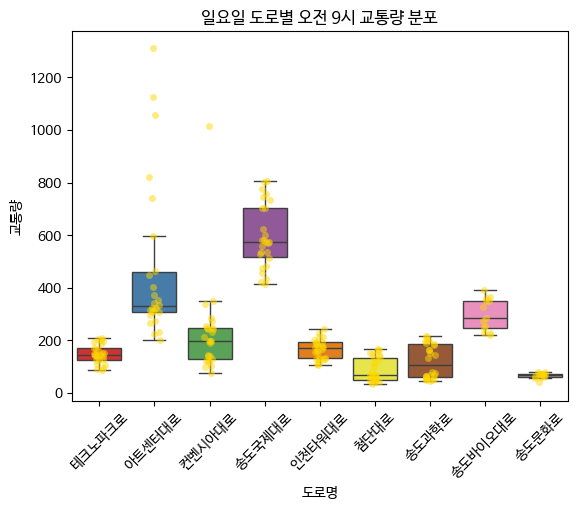

In [ ]:
# 📌 '요일' 열에서 '일'인 행만 선택합니다 (즉, 일요일만 뽑기)
sunday_df = df[df["요일"] == "일"]


# 🧹 일요일 데이터에서 필요한 열만 선택합니다: 일자, 도로명, 09시
df_9am_sunday = sunday_df[["일자", "도로명", "09시"]]


# ✏️ 열 이름 '09시'를 보기 쉽게 '교통량'으로 바꿉니다
# 👉 rename(): 열 이름을 바꾸는 함수입니다
# 👉 columns={"기존이름": "새이름"} 형식으로 작성합니다
# 👉 inplace=True: 원래 데이터프레임(df_9am_sunday)에 바로 적용하겠다는 뜻입니다
df_9am_sunday.rename(columns={"09시": "교통량"}, inplace=True)


# 📦 박스 플롯 그리기: 도로별 교통량 분포 시각화
# 👉 sns.boxplot(): 각 도로별로 교통량의 분포를 요약해서 박스 그림으로 보여줍니다
# 👉 showfliers=False: 이상치(튀는 값)는 표시하지 않겠다는 뜻입니다
# 👉 palette='Set1': 색상 스타일을 지정합니다
sns.boxplot(
    x="도로명",
    y="교통량",
    data=df_9am_sunday,
    showfliers=False,
    palette='Set1'
)


# 🌟 산점도 추가: 점 하나하나를 데이터로 표시합니다
# 👉 sns.stripplot(): 각 점을 도로별로 나열해서 보여줍니다
# 👉 alpha=0.5: 점을 반투명하게 보여줍니다
# 👉 jitter=True: 겹치는 점들을 살짝 흩어지게 만듭니다
sns.stripplot(
    x="도로명",
    y="교통량",
    data=df_9am_sunday,
    alpha=0.5,
    jitter=True,
    color='gold'
)


# 🌀 plt.xticks(): x축 글자(도로명)를 45도 회전시켜서 안 겹치게 합니다
plt.xticks(rotation=45)


# 🖼️ 그래프 제목, 축 이름 추가
plt.title("일요일 도로별 오전 9시 교통량 분포")
plt.xlabel("도로명")
plt.ylabel("교통량")


# 📊 그래프 보여주기
plt.show()



## 📊 분석 내용 (시각화 해석):
### 송도국제대로, 송도바이오대로는
    → 평일 평균에 비해 일요일 오전 9시 교통량이 낮은 편입니다.

###테크노파크로, 송도문화로는
    → 평균 교통량 자체가 적은 도로입니다.

### 송도문화로, 테크노파크로는
    → 교통량의 편차도 작아서 일정한 패턴을 보입니다.

### 아트센터대로는
    → 일부 이상치가 눈에 띄어, 특이한 교통량이 관측되는 경우가 있음을 보여줍니다.